## Tarea 3

### Montecarlo

#### 1. Integración Montecarlo

La figura 1 muestra una espira de radio a por la que circula una corriente I. El punto P está a una distancia r del centro de la espira con coordenadas esféricas (r, θ, φ). (Problema del Jackson (1988)) Resuelva la componente del potencial en el punto P en términos de las integrales elípticas:

\begin{equation}
A_\phi(r, \theta) = \frac{\mu_0}{4\pi} \frac{4 I a}{\sqrt{a^2+r^2+2ar \sin{\theta}}} \left[\frac{(2-k^2)K(k) - 2E(k)}{k^2}\right]
\end{equation}

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{d\phi}{\sqrt{1-k^{2} \sin^{2} \phi}},\quad E(k)=\int_{0}^{\pi/2} {\sqrt{1-k^2 \sin^{2}{\phi}}} d\phi
\end{equation}

\begin{equation}
k^2 = \frac{4ar \sin{\theta}}{a^2+r^2+2ar\sin{\theta}}
\end{equation}

Aquí $K(k)$ y $E(k)$ son integrales elípticas de primera y segunda especie, respectivamente. Para $a = 1$, $I = 3$ y $μ0/4π = 1$, calcule y grafique:

Iniciamos por definir las funciones presentadas y proponemos una solución usando integración Montecarlo.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

a = 1
I = 3

# N1 es el valor correspondiente al número de divisiones del intervalo
# N2 es el valor correspondiente a la cantidad de números aleatorios que se usaran para integrar
N1 = 1000
N2 = 100000

# Definición de k²
def k_sqr(r, theta):
    return 4*a*r*np.sin(theta)/(a**2+r**2+2*a*r*np.sin(theta))

# Definición del integrando de K
def fK(phi, r, theta):
    return 1/np.sqrt(1-k_sqr(r, theta)*np.sin(phi)**2)

# Definición del integrando de E
def fE(phi, r, theta):
    return np.sqrt(1-k_sqr(r, theta)*np.sin(phi)**2)

# Función para solucionar por Montecarlo
def int_montecarlo(f, inf, sup, N, r, theta):
    
    # Genera un array de números aleatorios con N1 filas y N2 columnas
    # N1 es el valor correspondiente al número de divisiones del intervalo
    # N2 es el valor correspondiente a la cantidad de números aleatorios que se usaran para integrar
    X = np.random.uniform(inf, sup, (N1,N))
    
    # Array para almacenar datos luego de aplicar la función
    fX = np.zeros((N1,N))
    
    # Se escoge una iteración dependiendo de la variable fijada
    # Para r fijo:
    if type(theta) == np.ndarray:
        for i in tqdm(range(N1)):
            # Evalúa uno de los theta con cada uno de los numeros aleatorios generados correspondientes
            fX[i] = f(X[i], r, theta[i])
            
            
    elif type(r) == np.ndarray:
        for i in tqdm(range(N1)):
            fX[i] = f(X[i], r[i], theta)
    
    values = (sup-inf)/N * np.sum(fX, axis = 1)
    #print(values.shape)
    
    return values

def A(r, theta):
    k2 = k_sqr(r, theta)
    
    K = int_montecarlo(fK, 0, np.pi/2, N2, r, theta)
    E = int_montecarlo(fE, 0, np.pi/2, N2, r, theta)
    
    A_var = (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))*((2-k2)*K - 2*E)/k2 
    return A_var

In [137]:
# Definimos los arrays en los que evaluaremos las funciones
TH = np.linspace(0, np.pi, N1, endpoint = False)
R = np.linspace(0.1, 10, N1)

Ath = A(1, TH)
Ar = A(R, np.pi/3)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 454.13it/s]
/tmp/ipykernel_5158/1518279476.py:59: RuntimeWarning: invalid value encountered in true_divide
  A_var = (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta))*((2-k2)*K - 2*E)/k2
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 449.30it/s]


a) $A_\phi(r=1, \theta)$ vs $\theta$

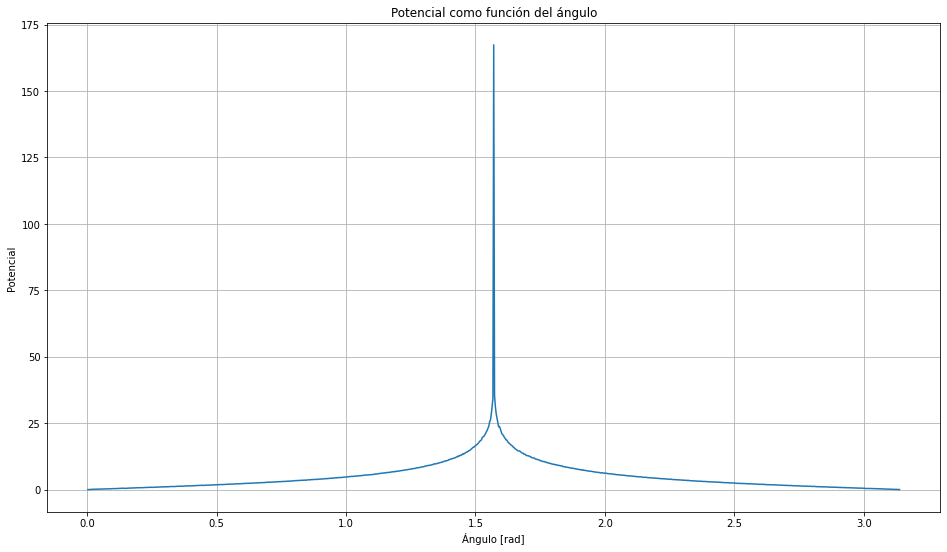

In [139]:
plt.figure(figsize=(16,9))
plt.title("Potencial como función del ángulo")
plt.xlabel("Ángulo [rad]")
plt.ylabel("Potencial")
plt.plot(TH, Ath)
plt.grid()

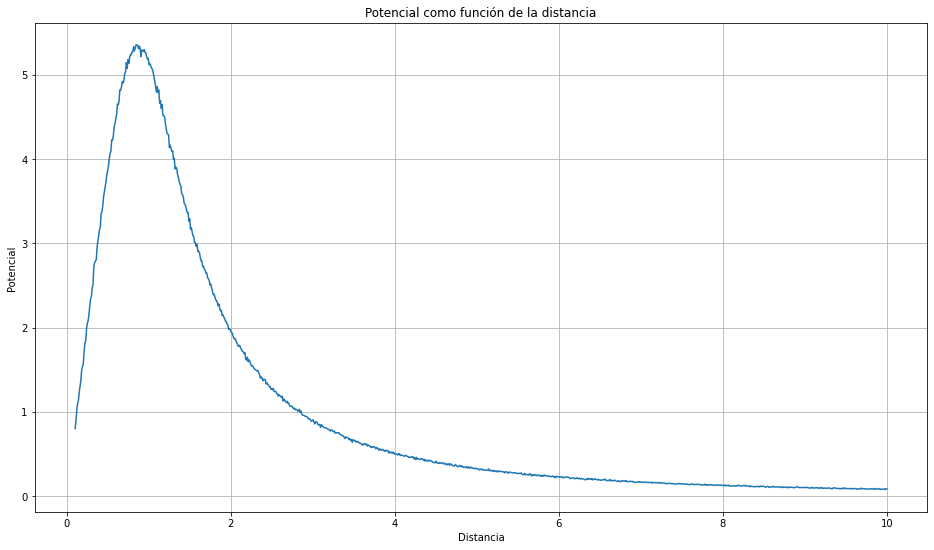

In [140]:
plt.figure(figsize=(16,9))
plt.title("Potencial como función de la distancia")
plt.xlabel("Distancia")
plt.ylabel("Potencial")
plt.plot(R, Ar)
plt.grid()

#### 2. Cálculo del número $\pi$

Considerando el artículo "Estudio del método de Monte Carlo en simulaciones para la estimación del valor de \pi", reproduzca cada uno de los cálculos allí mostrados. Algunos ya fueron hechos en clase, ahora modifiquelos y verifique que los datos publicados son ciertos.